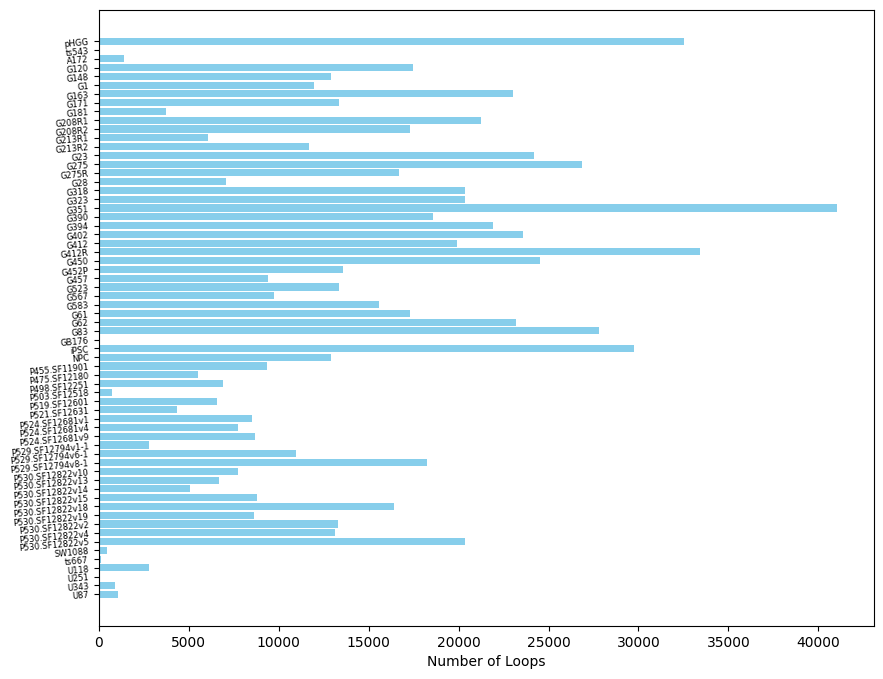

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re  # 导入正则表达式模块

# 设置当前目录
directory = '/cluster/home/tmp/GBM/HiC/10loop/mustache/diffloop_NPC'

# 遍历目录，找到所有的.bedpe文件
bedpe_files = [f for f in os.listdir(directory) if f.endswith('.bedpe')]

# 初始化一个列表来存储处理后的文件名和行数
file_lines = []

# 统计每个文件的行数，并处理文件名
for file in bedpe_files:
    # 使用正则表达式删除文件名中的_new和_mustache.bedpe
    clean_file_name = re.sub(r'(?:_new|_mustache\.bedpe)', '', file)
    
    # 打开文件并统计行数
    with open(os.path.join(directory, file), 'r') as f:
        lines = f.readlines()
    
    # 跳过行数为0的文件
    if len(lines) > 0:
        # 将处理后的文件名和行数添加到列表中
        file_lines.append((clean_file_name, len(lines)))

# 将数据转换为DataFrame
df = pd.DataFrame(file_lines, columns=['Cleaned File', 'Lines'])

# 检查是否有数据要绘制
if not df.empty:
    # 绘制柱状图
    plt.figure(figsize=(10, 8))
    plt.barh(df['Cleaned File'], df['Lines'], color='skyblue')
    plt.xlabel('Number of Loops')
#    plt.title('Number of Loops')

    # 反转y轴，长的条在上
    plt.gca().invert_yaxis()

    # 调整Y轴刻度标签的字体大小和旋转角度
    plt.tick_params(axis='y', which='both', labelsize=6, rotation=5)

    # 显示图表
    plt.show()
else:
    print("No data to plot, or all files have zero lines.")